<a href="https://colab.research.google.com/github/tarun-jethwani/DataAnalysesNotebooks/blob/master/titanic_passegers_data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [0]:
titanic_df = pd.read_csv("/gdrive/My Drive/titanic/train.csv")

In [97]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Plotting can oftne reviel some important underlying/hidden details abbout the Data 

## Male Female Count Plot

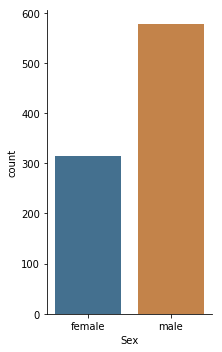

In [100]:
sns.catplot(x="Sex", y = None,
                data=titanic_df, saturation=.5,
                 kind="count", ci=None, aspect=.6, order=['female', 'male'])

## Male Female Count divided among Pclass attribute 

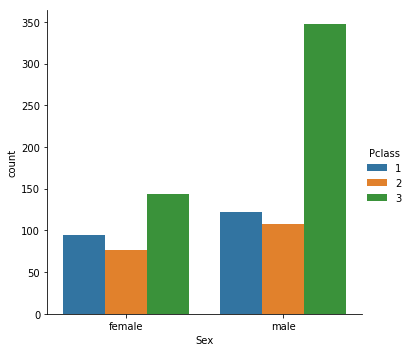

In [101]:
sns.catplot('Sex', y=None, hue='Pclass', data=titanic_df, kind='count', order=['female', 'male'])

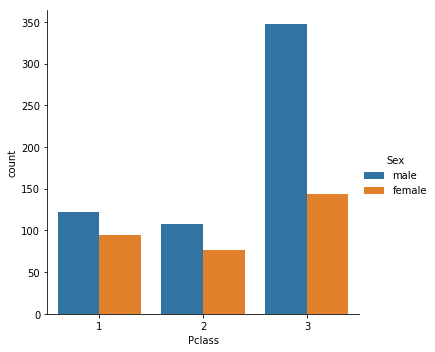

In [102]:
sns.catplot('Pclass', y=None, hue='Sex', data=titanic_df, kind='count')

### Applying a Filter to Create new column 'person' in the existing DataFrame

In [0]:
def male_female_child(passenger):
  
  age, sex = passenger
  
  if age < 16:
    return 'child'
  else:
    return sex

In [0]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [105]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


## 'Pclass' Coulmn plotting among type of Persons

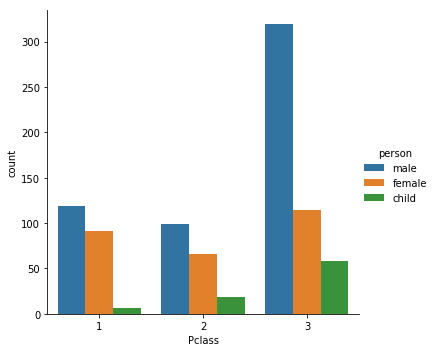

In [106]:
sns.catplot(x='Pclass', y = None, hue='person', data=titanic_df, kind='count' )

### Histogram of Ages 

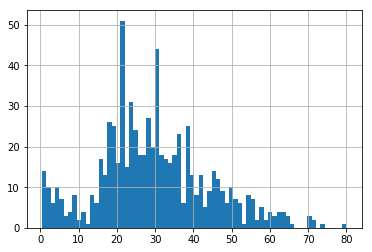

In [49]:
titanic_df['Age'].hist(bins=70)

In [50]:
titanic_df['Age'].mean()

29.69911764705882

In [51]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### Kernel Density Estimation Plot of 'Age' for Male, Female Seperately

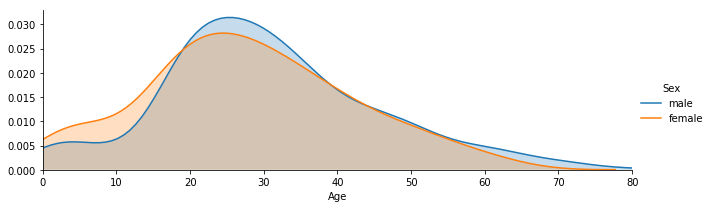

In [109]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=3)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))
fig.add_legend()

### Kernel Density Estimation Plot of Age of Persons

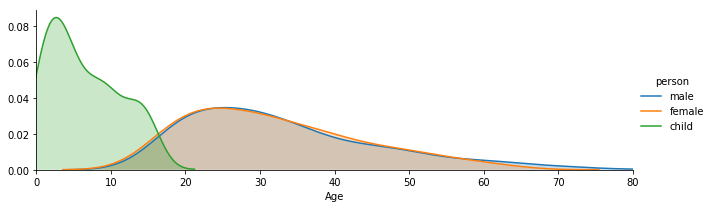

In [110]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=3)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))
fig.add_legend()

### Kernel Density Estimation Plots for 'Age' for different Pclass attribute

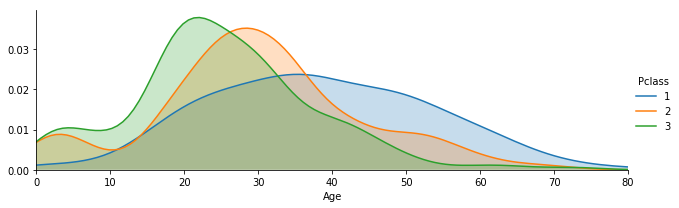

In [111]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=3)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))
fig.add_legend()

### Most of the people from Pclass 1 and Pclass 2 are less than 40

In [112]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [0]:
deck = titanic_df['Cabin'].dropna()

In [114]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [0]:
levels = []

for level in deck:
  levels.append(level[0])
  

### Count of people accroding to Cabin levels = [A,B,C,D,E,F,G]

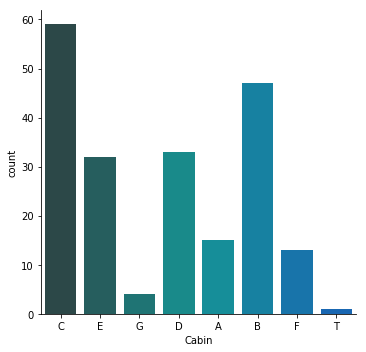

In [73]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.catplot(x='Cabin', y=None, data=cabin_df, palette='winter_d', kind='count' )

After Removing cabin Type = "T"

In [0]:
cabin_df['Cabin'] = cabin_df[cabin_df['Cabin'] != 'T']

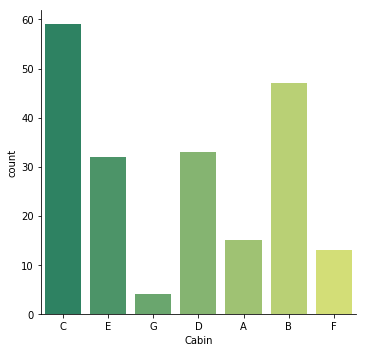

In [81]:
sns.catplot('Cabin', data=cabin_df, kind='count', palette='summer')

Plot for Count VS Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton divided among Pclass

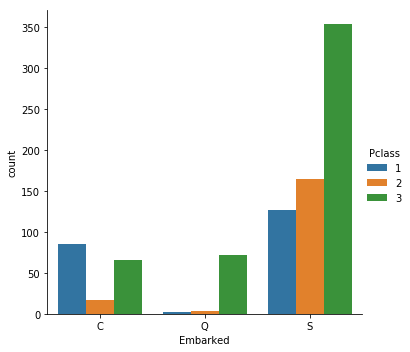

In [116]:
sns.catplot('Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

you can seen very few people boarder form Queenstown, 
People who boarded from Southamption were largely from Pclass3, 

In [117]:
#who was alone and who was with family 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Column = 'SibSp' is for # of siblings / spouses aboard the Titanic

Column = 'Parch' is for # of parents / children aboard the Titanic

In [0]:
# Creating a new column 
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [121]:
titanic_df['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [122]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'with Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = 'Alone'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [124]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,with Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,with Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,with Family


## Count of People "with Family" and "Alone"

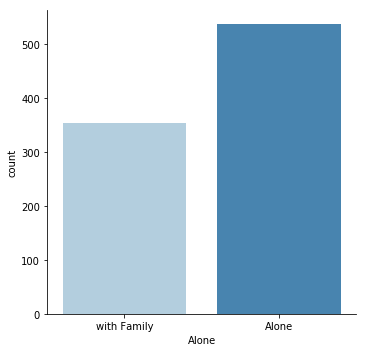

In [126]:
sns.catplot('Alone', data=titanic_df, kind='count', palette='Blues')

In [0]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [128]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


## Survivor vs Count

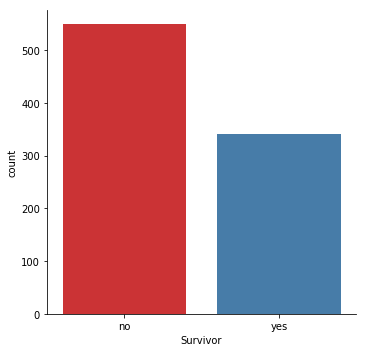

In [138]:
sns.catplot('Survivor', data=titanic_df, kind='count', palette='Set1')

### *More People not survived Titanic Sink*

## Survival VS Pclass

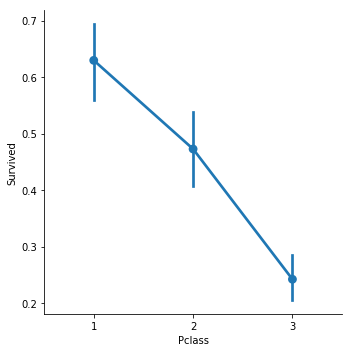

In [140]:
sns.catplot('Pclass', 'Survived', data=titanic_df, kind='point')

### *So 3rd Class Passengers had fewer chances of Survival*

### Survival VS Pclass for different Person Types

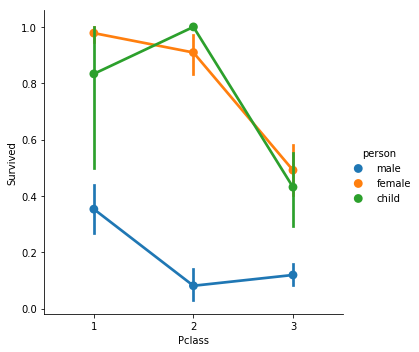

In [142]:
sns.catplot('Pclass', 'Survived', hue='person', data=titanic_df, kind='point')

### *Male had significantly less Chances of Survival as compared to children and Females*

## Chance of Survival VS Age 

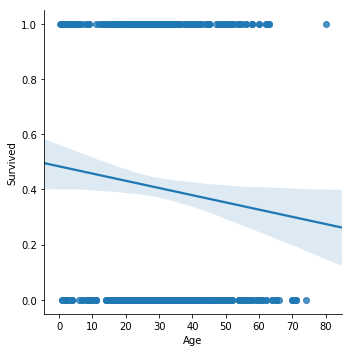

In [144]:
sns.lmplot('Age', 'Survived', data=titanic_df)

### Older People had fewer chances of Survival *italicized text*

### Chance of Survival VS Age among Different Classes 

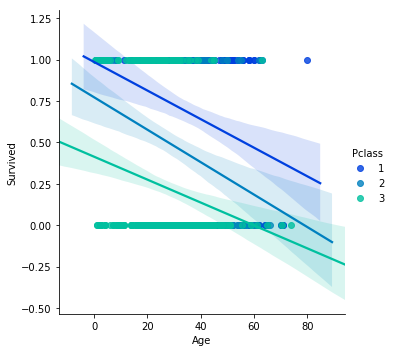

In [145]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter')

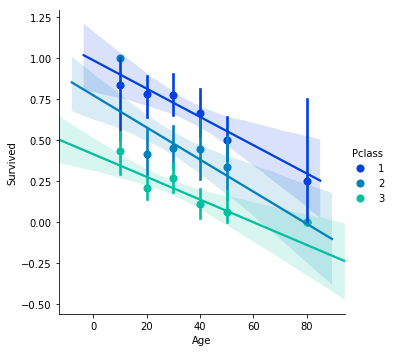

In [146]:
generations = [10, 20, 30, 40, 50, 80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

### Chances of Survival VS Age between Male and Female

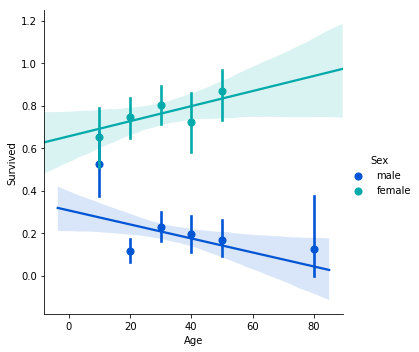

In [147]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

In [0]:
titanic_df_deck = titanic_df.dropna()

In [0]:
def deck_label(cabin):
  return cabin[0]

In [157]:
titanic_df_deck['Deck'] = titanic_df_deck['Cabin'].apply(deck_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [158]:
titanic_df_deck.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,with Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,male,Alone,yes,D
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,male,Alone,yes,A
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,male,with Family,no,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female,with Family,yes,D
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,male,with Family,no,B


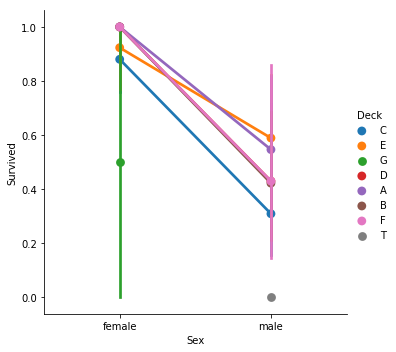

In [163]:
sns.catplot('Sex','Survived', hue='Deck', data=titanic_df_deck, kind='point' )

### *Intutively Chances of Survival were very less for 'T' Deck/Cabin People, and very less data points are available for the same*

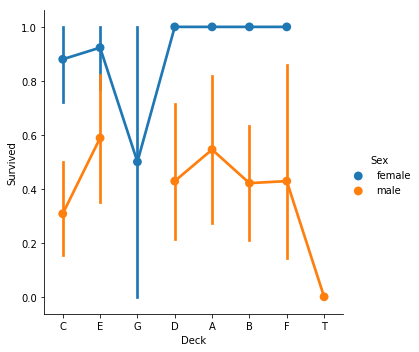

In [161]:
sns.catplot('Deck','Survived', hue='Sex', data=titanic_df_deck, kind='point' )